In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
prod = pd.read_csv('/content/Products.csv')
cust = pd.read_csv('/content/Customers.csv')
trans = pd.read_csv('/content/Transactions.csv')

In [ ]:
datasets = {'prod': prod, 'cust': cust, 'trans': trans}

for name, df in datasets.items():
    print(f"Null values in {name} dataset:\n{df.isnull().sum()}\n")

Null values in prod dataset:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Null values in cust dataset:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Null values in trans dataset:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64



### As we can see that there are no null values in the dataset we can move further

In [ ]:
cust['SignupDate'] = pd.to_datetime(cust['SignupDate'])
trans['TransactionDate'] = pd.to_datetime(trans['TransactionDate'])

In [ ]:
trans.describe()

,TransactionDate,Quantity,TotalValue,Price
count,1000,1000.000000,1000.000000,1000.00000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000
std,NaN,1.117981,493.144478,140.73639


In [ ]:
prod.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


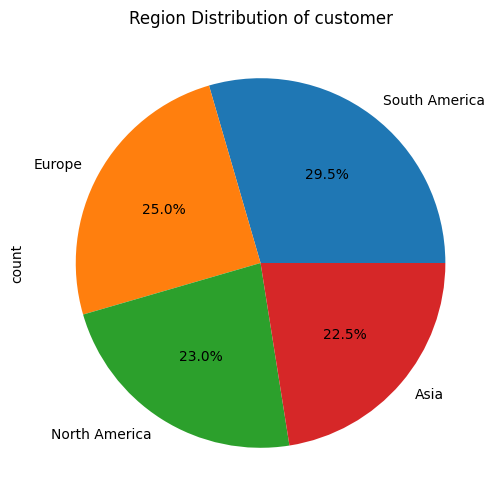

In [ ]:
cust['Region'].value_counts().plot(kind= 'pie', autopct='%1.1f%%', figsize=(6,6))
plt.title('Region Distribution of customer')
plt.show()

### We can see that Maximum number of customers come from South America whereas least comes from Asia.

In [ ]:
import pandas as pd

cust['SignupDate'] = pd.to_datetime(cust['SignupDate'])

region_trends = cust.groupby(['Region', cust['SignupDate'].dt.to_period('M')]).size().unstack(fill_value=0)


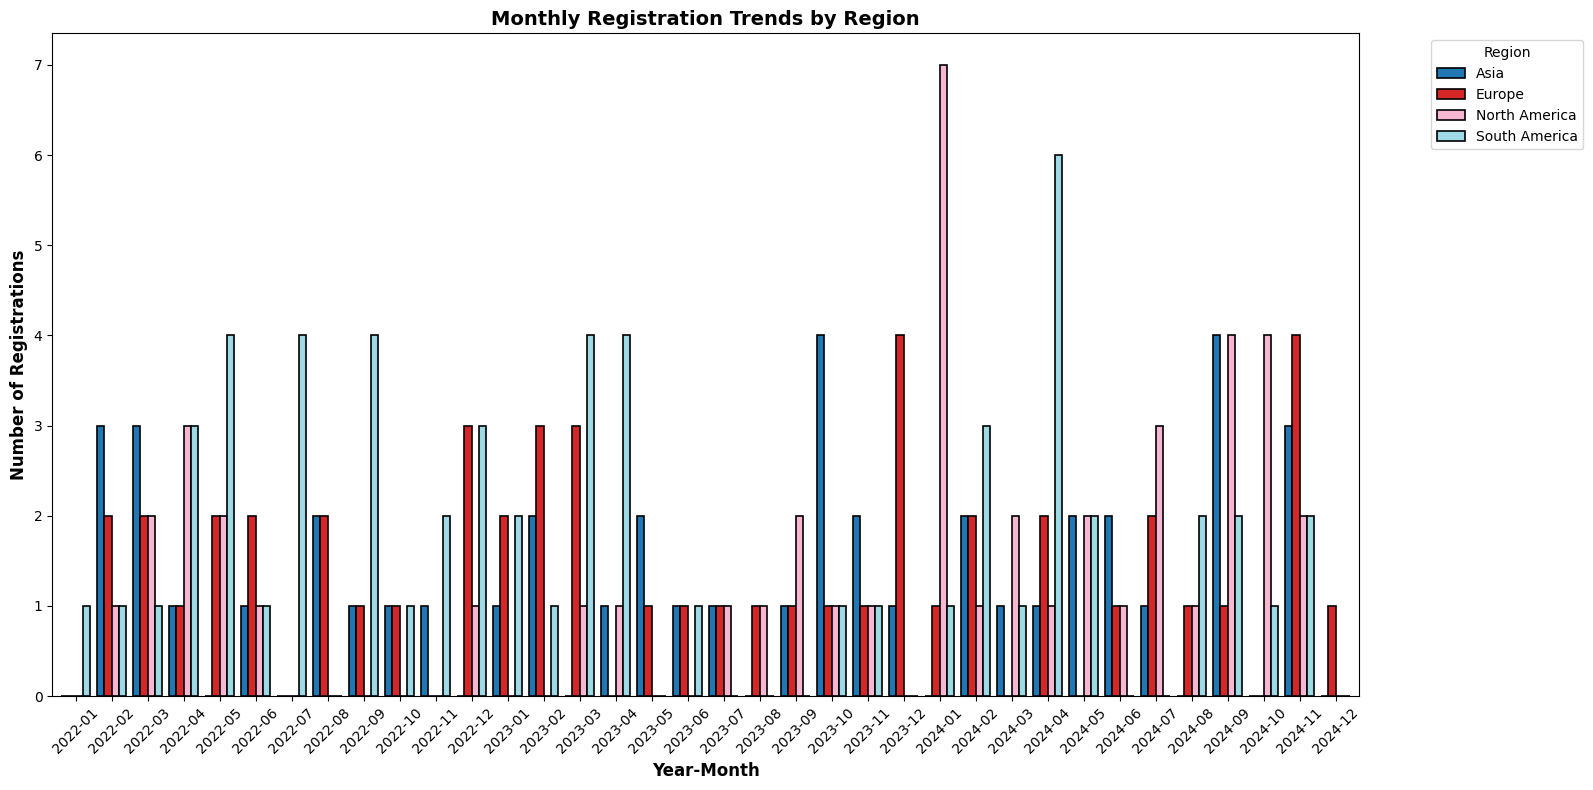

In [ ]:

ax = region_trends.T.plot(
    kind='bar',
    figsize=(16, 8),
    colormap='tab20',
    width=0.8,
    edgecolor='black',
    linewidth=1.2
)

plt.title('Monthly Registration Trends by Region', fontsize=14, weight='bold')
plt.xlabel('Year-Month', fontsize=12, weight='bold')
plt.ylabel('Number of Registrations', fontsize=12, weight='bold')

plt.xticks(rotation=45)

plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()


### We see a spike in registrarion in in Jan 2024 espicially in North America.

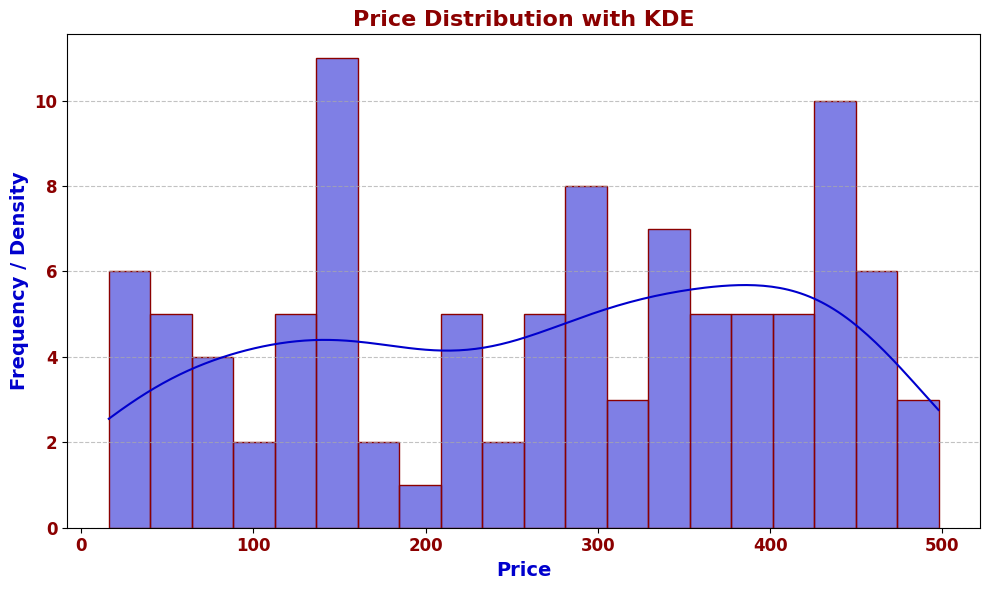

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(
    prod['Price'],
    bins=20,
    kde=True,
    color='mediumblue',  # Bold color for the histogram
    edgecolor='darkred',  # Bold color for the edges
)

# Title and labels with bold colors
plt.title('Price Distribution with KDE', fontsize=16, weight='bold', color='darkred')
plt.xlabel('Price', fontsize=14, weight='bold', color='mediumblue')
plt.ylabel('Frequency / Density', fontsize=14, weight='bold', color='mediumblue')

# Grid with subtle color
plt.grid(axis='y', linestyle='--', alpha=0.7, color='darkgray')

# Customize tick colors
plt.xticks(fontsize=12, weight='bold', color='darkred')
plt.yticks(fontsize=12, weight='bold', color='darkred')

# Tight layout for better fit
plt.tight_layout()

# Display the plot
plt.show()


### The Price Distribution is uniform but not normalized.

In [ ]:
data= trans.merge(prod, on='ProductID').merge(cust, on='CustomerID')

most_purchased_products= data.groupby('ProductName')['Quantity'].sum().sort_values(ascending= False)


revenue_by_product= data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending= False)


# Monthly Revenue
data['month']=data['TransactionDate'].dt.to_period('M')
monthly_revenue= data.groupby('month')['TotalValue'].sum().sort_values(ascending= False)


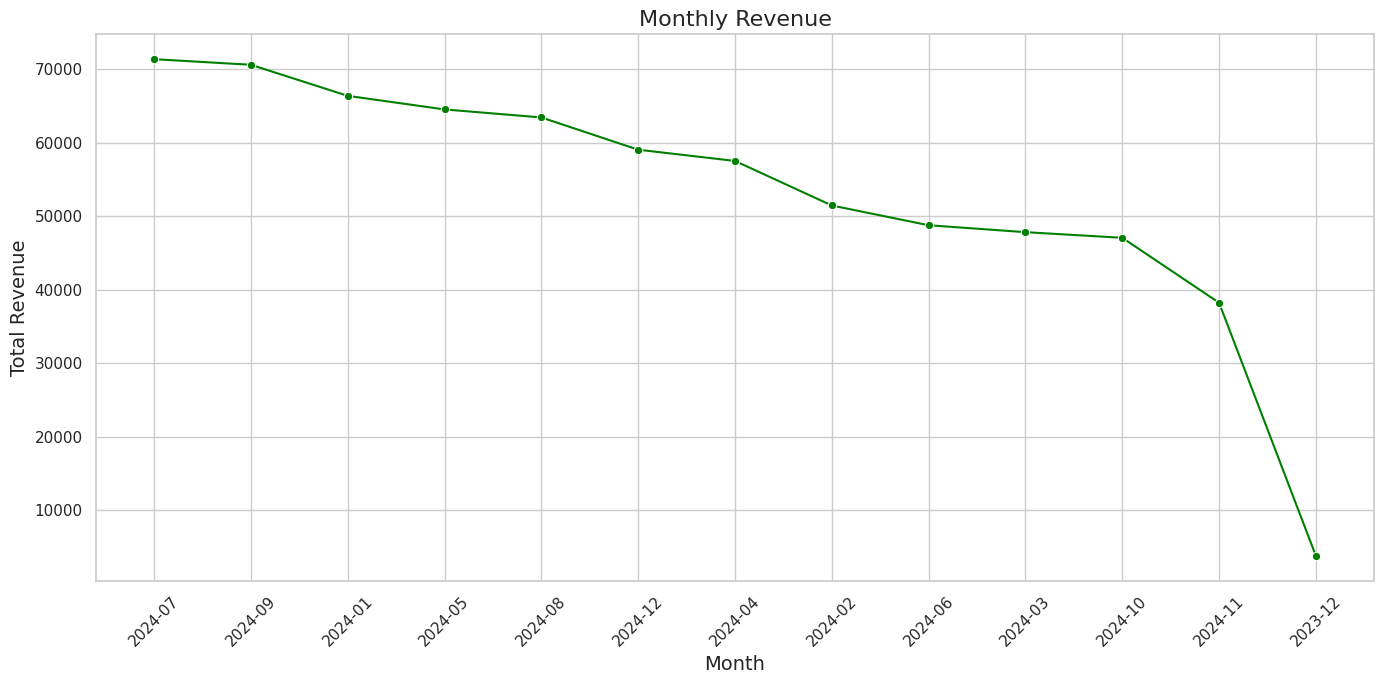

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for plots
sns.set(style="whitegrid")


# Monthly Revenue
plt.figure(figsize=(14, 7))  # Increased figure size for better spacing
sns.lineplot(x=monthly_revenue.index.astype(str), y=monthly_revenue.values, marker='o', color='green')
plt.title('Monthly Revenue', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.xticks(rotation=45)  # Keeping rotation to 45 for clarity in monthly labels
plt.tight_layout()
plt.show()


### Here the monthly reveneu is increasing from December 2023 to July 2024. the trend might repeat in upcoming months

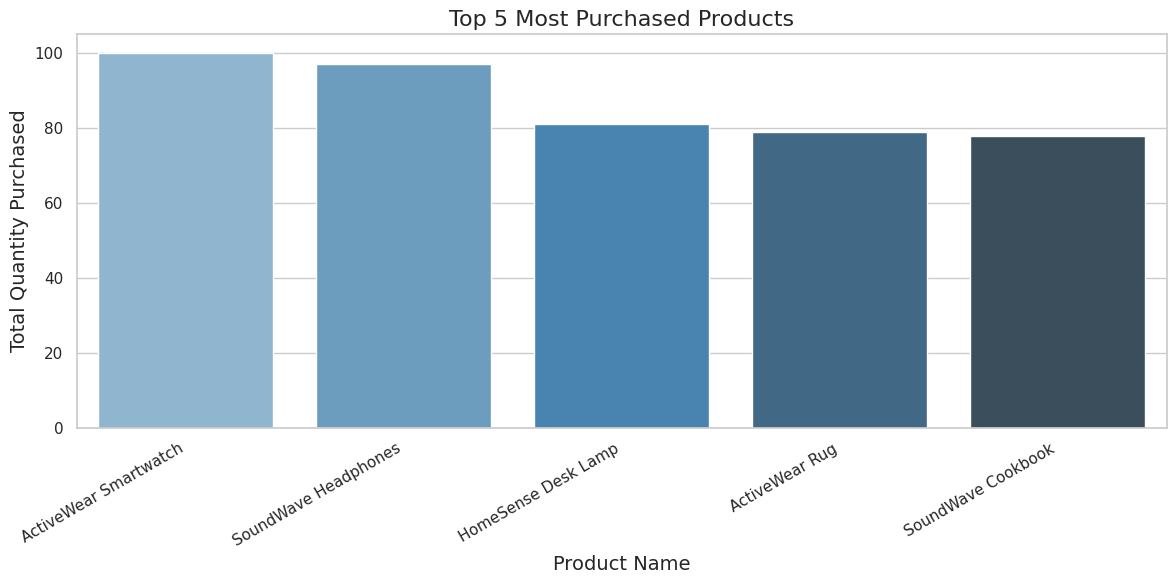

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

top_5_most_purchased = most_purchased_products.head(5)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_most_purchased.index, y=top_5_most_purchased.values, palette='Blues_d')
plt.title('Top 5 Most Purchased Products', fontsize=16)
plt.xlabel('Product Name', fontsize=14)
plt.ylabel('Total Quantity Purchased', fontsize=14)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()




### Active smart watch is the product which have highest sales followed by SoundWave Headphones.



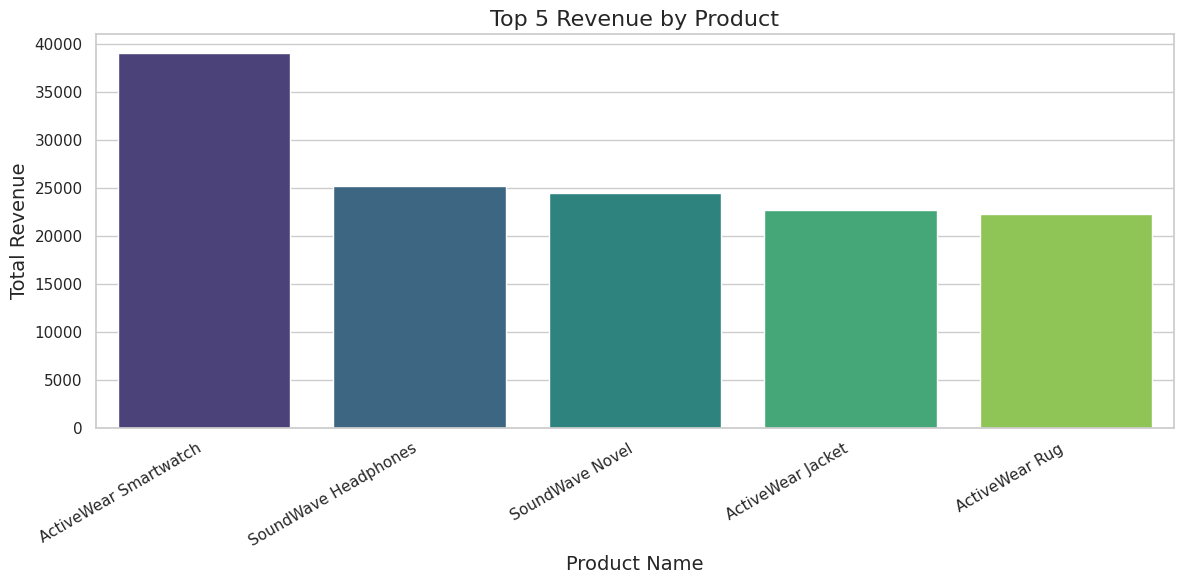

In [ ]:
top_5_revenue_by_product = revenue_by_product.head(5)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_revenue_by_product.index, y=top_5_revenue_by_product.values, palette='viridis')
plt.title('Top 5 Revenue by Product', fontsize=16)
plt.xlabel('Product Name', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


Again Active Smart watch showed highest revenue.The Active Smart Watch should the highest revenue. So stocking up on this watch will ensure that they will give maximum revenue with minimal risk of being stored for a long time




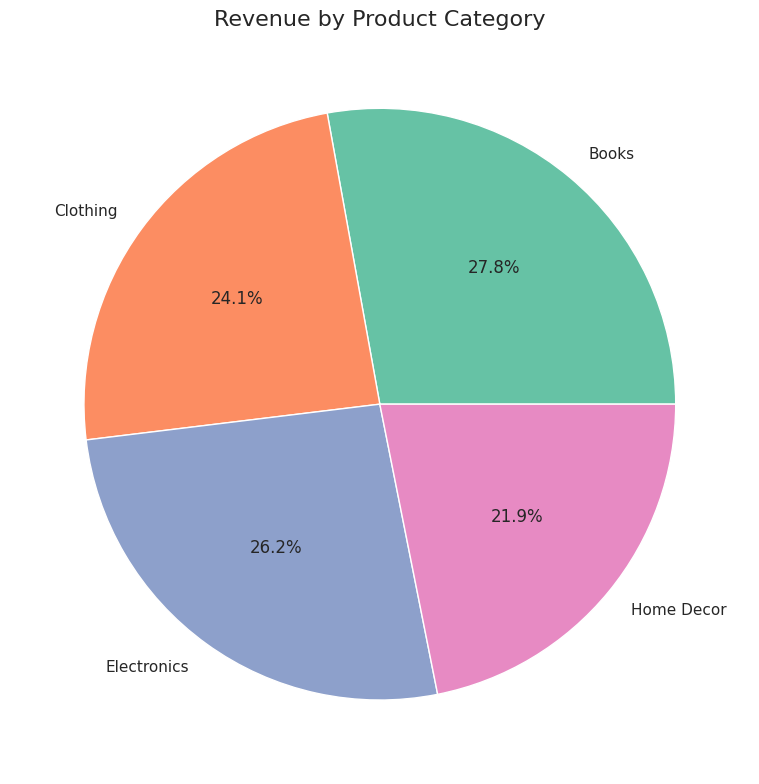

In [ ]:
import matplotlib.pyplot as plt

revenue_by_category= data.groupby('Category')['TotalValue'].sum()

plt.figure(figsize=(8, 8))
plt.pie(revenue_by_category, labels=revenue_by_category.index, autopct='%1.1f%%', colors=sns.color_palette('Set2', len(revenue_by_category)))
plt.title('Revenue by Product Category', fontsize=16)
plt.tight_layout()
plt.show()


## Here we can see that books are providing highest revenue and hence we should focus more on Books as in contrast Home Decor has lowest percent revenue so its ok to consider them less

In [ ]:
from datetime import datetime
last_date = datetime(2024, 12,28)
data = trans.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (last_date - x.max()).days,
    'TransactionID': 'count',
    'TotalValue': 'sum'
}).rename(columns={
    'TransactionDate': 'LastTrans',
    'TransactionID': 'TransactionCount',
    'TotalValue': 'totalSpend'
}).reset_index()
data

,CustomerID,LastTrans,TransactionCount,totalSpend
0,C0001,55,5,3354.52
1,C0002,24,4,1862.74
2,C0003,125,4,2725.38
3,C0004,4,8,5354.88
4,C0005,53,3,2034.24
...,...,...,...,...
194,C0196,12,4,4982.88
195,C0197,0,3,1928.65
196,C0198,84,2,931.83
197,C0199,62,4,1979.28


# According to RFM ranking – An effective approach to customer segmentation research paper RFM plays an important role in customer segemntation. Hence we will use RFM approach in each of our following problems. [link ](https://www.sciencedirect.com/science/article/pii/S1319157818304178)

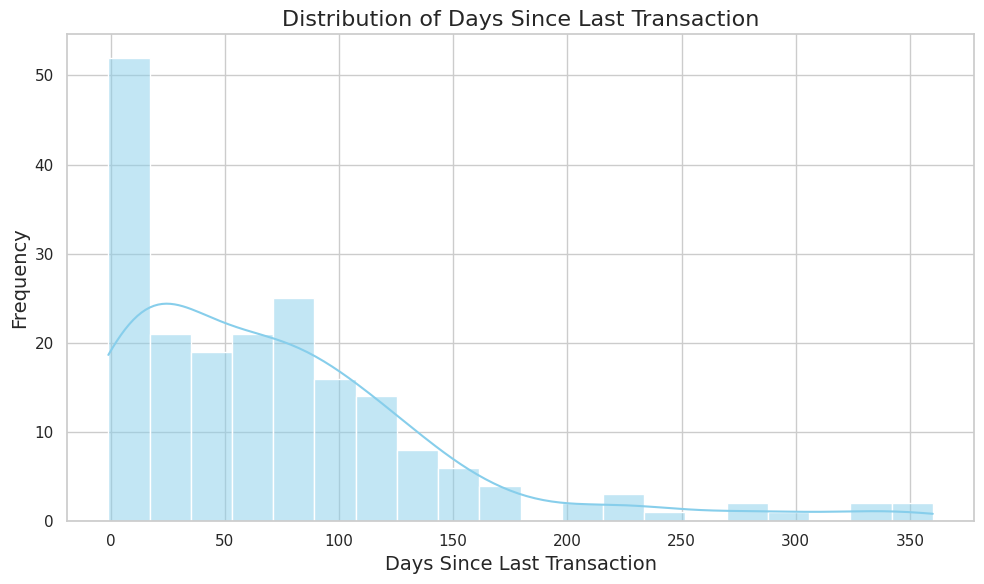

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data['LastTrans'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Days Since Last Transaction', fontsize=16)
plt.xlabel('Days Since Last Transaction', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()




Here we see that most of the active customers stay active in puchasing with mostly concentrated in 0 to 150 days. We can focus our attendtion to these customers by giving them special offers like discounts

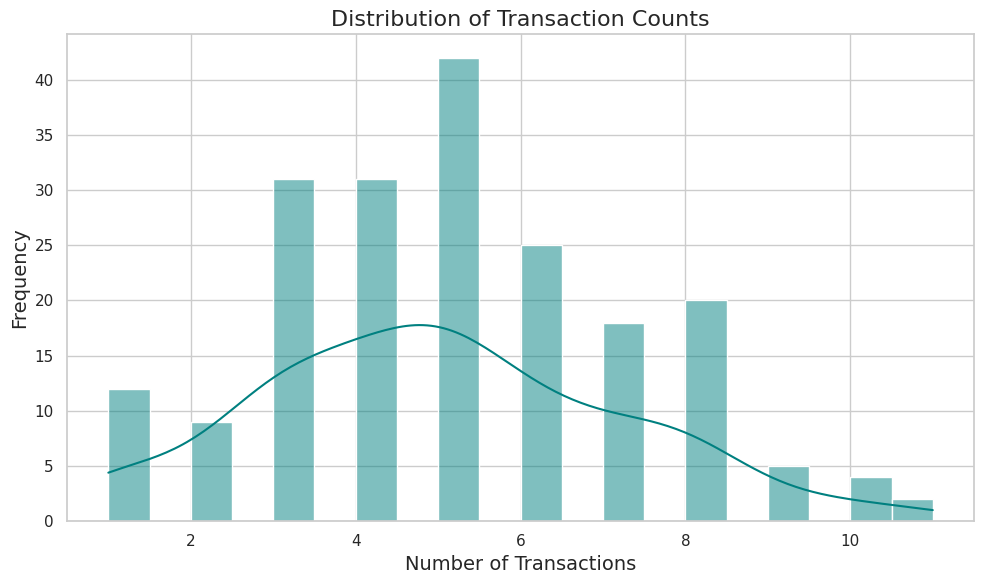

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['TransactionCount'], bins=20, kde=True, color='teal')
plt.title('Distribution of Transaction Counts', fontsize=16)
plt.xlabel('Number of Transactions', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()



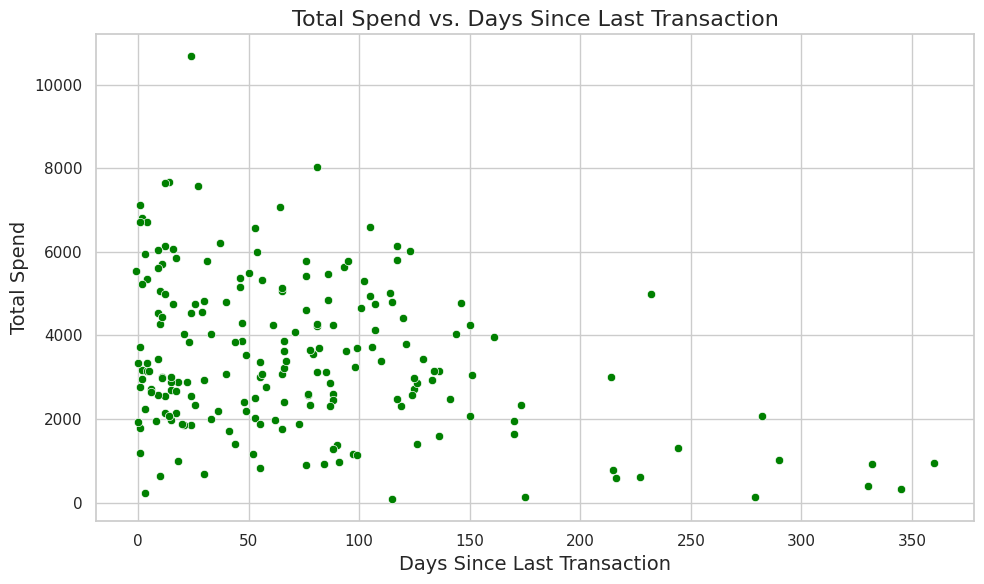

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LastTrans', y='totalSpend', data=data, color='green')
plt.title('Total Spend vs. Days Since Last Transaction', fontsize=16)
plt.xlabel('Days Since Last Transaction', fontsize=14)
plt.ylabel('Total Spend', fontsize=14)
plt.tight_layout()
plt.show()



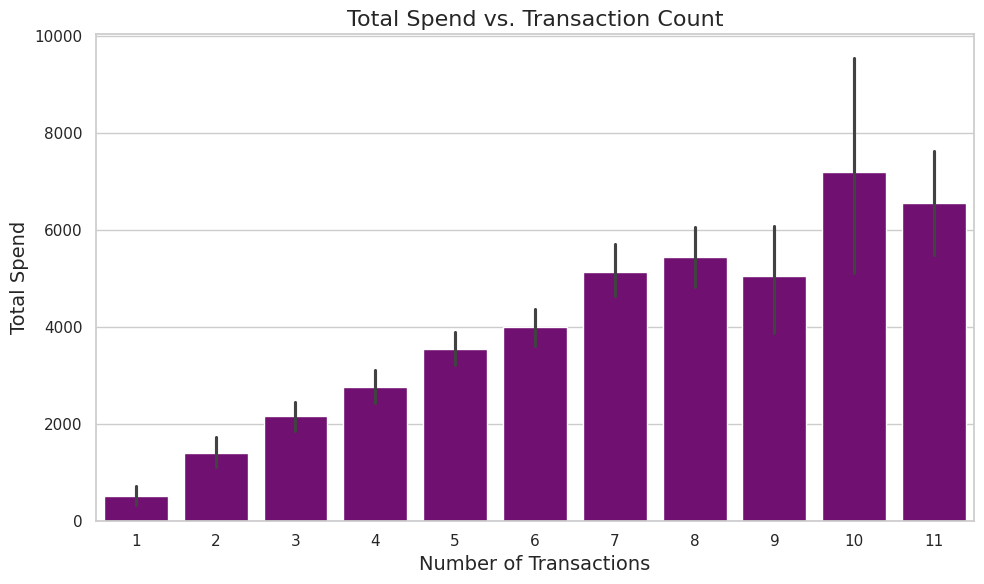

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='TransactionCount', y='totalSpend', data=data, color='purple')
plt.title('Total Spend vs. Transaction Count', fontsize=16)
plt.xlabel('Number of Transactions', fontsize=14)
plt.ylabel('Total Spend', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
data

,CustomerID,LastTrans,TransactionCount,totalSpend
0,C0001,55,5,3354.52
1,C0002,24,4,1862.74
2,C0003,125,4,2725.38
3,C0004,4,8,5354.88
4,C0005,53,3,2034.24
...,...,...,...,...
194,C0196,12,4,4982.88
195,C0197,0,3,1928.65
196,C0198,84,2,931.83
197,C0199,62,4,1979.28


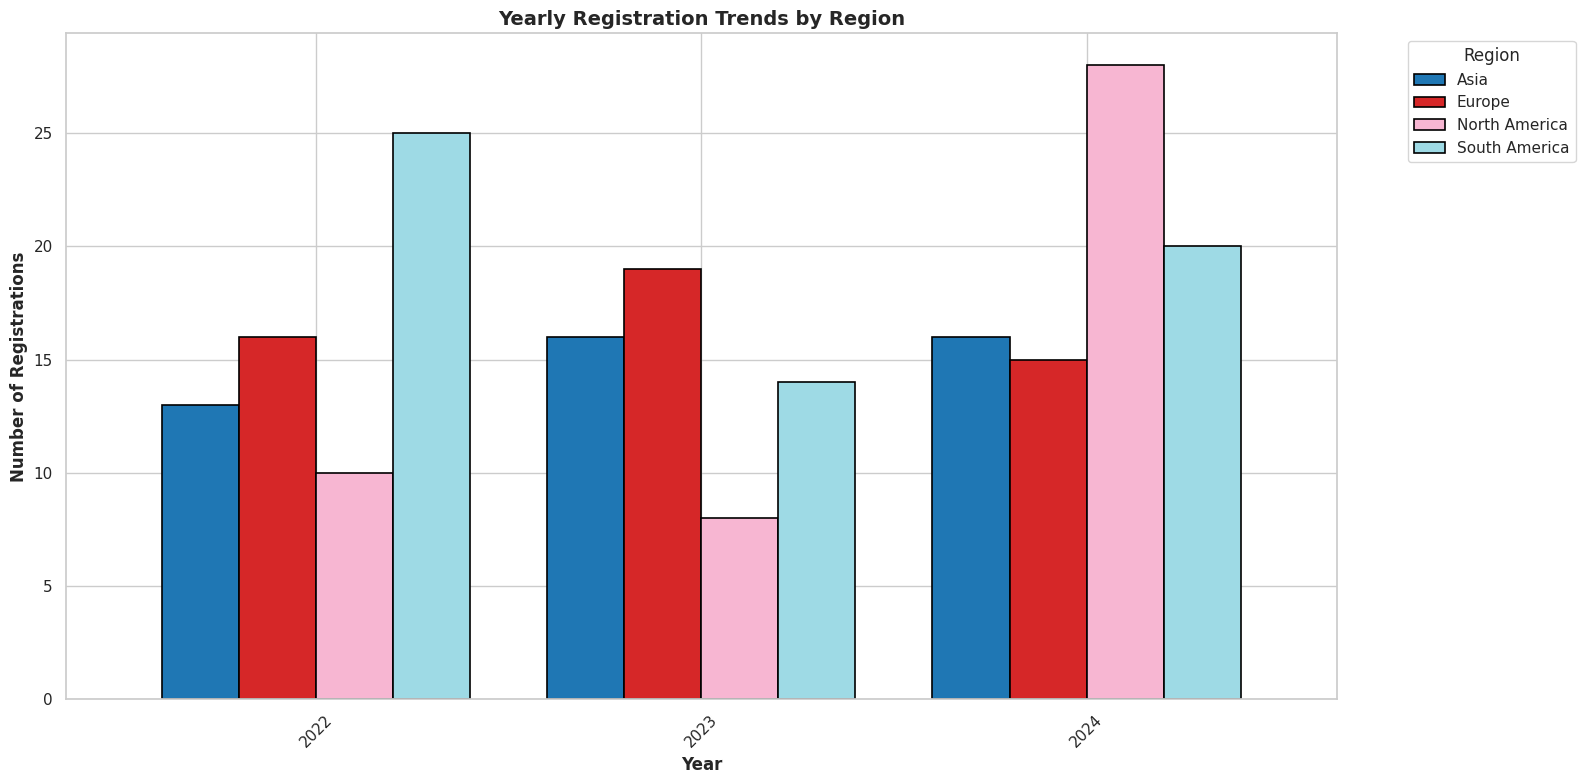

In [ ]:
region_trends_year = cust.groupby([cust['Region'], cust['SignupDate'].dt.year]).size().unstack(fill_value=0)

ax = region_trends_year.T.plot(
    kind='bar',
    figsize=(16, 8),
    colormap='tab20',
    width=0.8,
    edgecolor='black',
    linewidth=1.2
)

plt.title('Yearly Registration Trends by Region', fontsize=14, weight='bold')
plt.xlabel('Year', fontsize=12, weight='bold')
plt.ylabel('Number of Registrations', fontsize=12, weight='bold')

plt.xticks(rotation=45)

plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()
